In [9]:
import re
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
pd.options.display.max_columns = 100

In [10]:
# df_feat = joblib.load('df_feat.pkl')
df_feat = joblib.load('df_feat_med.pkl')
sign_cols = [it for it in df_feat.columns if re.search('_stat', it) or it in ['Fighter', 'Opponent', 'Date', 'Result'] ]
X = df_feat[sign_cols]

In [30]:
df_full = pd.read_csv('ufc_datalens.csv')
df_all = joblib.load('df_all.pkl')

In [34]:
df_all.filter(regex='str.*_stat$').describe()

# df_full.loc[df_full['kd_stat']>df_full['kd_stat'].quantile(0.95), ['Event', 'Fighter','Opponent', 'Method:', 'Sig. str', ]].tail()

,sig_str_stat,sig_str_dam_stat,sig_str_h_stat,sig_str_h_dam_stat,sig_str_l_stat,sig_str_l_dam_stat,sig_str_b_stat,sig_str_b_dam_stat,sig_str_d_stat,sig_str_d_dam_stat,sig_str_cl_stat,sig_str_cl_dam_stat,sig_str_gr_stat,sig_str_gr_dam_stat
count,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000,12671.000000
mean,0.782745,0.782863,0.747114,0.747223,0.584046,0.584046,0.642732,0.642732,0.752540,0.752637,0.537885,0.537885,0.446446,0.446548
std,0.327154,0.327135,0.335366,0.335344,0.371928,0.371928,0.347454,0.347454,0.333157,0.333118,0.380127,0.380127,0.419438,0.419484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.724780,0.724780,0.668325,0.668325,0.000000,0.000000,0.581811,0.581811,0.668325,0.668325,0.000000,0.000000,0.000000,0.000000
50%,0.832553,0.832553,0.832553,0.832553,0.724780,0.724780,0.767704,0.767704,0.832553,0.832553,0.693145,0.693145,0.581811,0.581811
75%,0.956672,0.956725,0.920072,0.920072,0.858621,0.858621,0.875720,0.875720,0.921358,0.921475,0.832553,0.832553,0.826934,0.827111
max,1.269103,1.269451,1.213776,1.214043,1.037137,1.037137,1.034530,1.034530,1.233634,1.233634,1.013894,1.013894,1.093878,1.094196


In [33]:
for col in [it for it in df_all.columns if re.search('str.*_stat$', it)]:
    df_all[col] = np.clip(df_all[col], 0, df_all[col].quantile(0.95))
    df_all[col] = np.power(df_all[col], 0.2)

In [25]:
df_full['sig_str_d_stat'] = np.clip(df_full['sig_str_d_stat'], 0, df_full['sig_str_d_stat'].quantile(0.95))
df_full['sig_str_d_stat'] = np.power(df_full['sig_str_d_stat'], 0.2)

# hist stat

AttributeError: 'Rectangle' object has no property 'xlims'

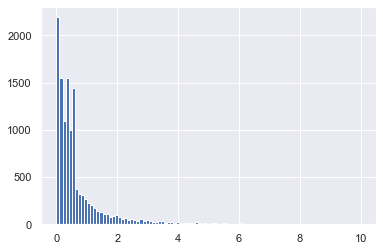

In [64]:
df_full['sig_str_stat'].hist(bins=np.linspace(0,10,100), xlim=(0,4))

In [101]:
df_all.groupby('Fighter')['sig_str_stat'].mean().sort_values(ascending=False)[:15]

Fighter
Terrance McKinney        34.285714
Todd Duffee               9.384650
Mark Weir                 8.475298
Phil Hawes                7.933333
Thomas Ramirez            7.500000
Gary Goodridge            6.724957
Chan Sung Jung            6.333256
Jairzinho Rozenstruik     6.215881
Sumudaerji                6.136364
Matthew Semelsberger      6.012500
Ronda Rousey              5.736490
Ode Osbourne              5.474623
Johnny Walker             5.447766
Harold Howard             5.164893
Jon Hess                  5.060241
Name: sig_str_stat, dtype: float64

# Research feature gen

In [3]:
df_all = joblib.load('df_all.pkl')

In [4]:
df_all.loc[df_all['Fighter']=='Conor McGregor',['Opponent', 'sig_str_stat', 'sig_str_gr_stat', 'sig_str_d_stat', 'win_stat']]

,Opponent,sig_str_stat,sig_str_gr_stat,sig_str_d_stat,win_stat
8606,Marcus Brimage,0.895522,4.477612,5.373134,1
2387,Max Holloway,0.200000,0.600000,0.133333,1
2827,Diego Brandao,1.959184,1.959184,0.000000,1
9280,Dustin Poirier,5.094340,2.264151,2.830189,1
3072,Dennis Siver,0.579710,1.014493,1.014493,1
9651,Chad Mendes,0.603015,0.703518,0.904523,1
9864,Jose Aldo,23.076923,9.230769,13.846154,1
3607,Nate Diaz,0.108696,0.217391,0.652174,0
10172,Nate Diaz,0.160000,0.000000,0.280000,1
10268,Eddie Alvarez,0.247934,0.619835,0.495868,1


## check rolling win stat

In [19]:
df_feat.loc[df_feat['Fighter']=='Conor McGregor', ['Opponent', 'win_stat', 'win_stat_rol', 'win_stat_rol_sub' ]]

,Opponent,win_stat,win_stat_rol,win_stat_rol_sub
953,Dustin Poirier,1,1.000000,0.200000
954,Dennis Siver,1,1.000000,0.388889
955,Chad Mendes,1,1.000000,0.200000
956,Jose Aldo,1,1.000000,0.000000
957,Nate Diaz,0,1.000000,0.380952
958,Nate Diaz,1,0.875000,0.238636
959,Eddie Alvarez,1,0.888889,0.138889
960,Khabib Nurmagomedov,0,0.900000,-0.100000
961,Donald Cerrone,1,0.818182,0.121212
962,Dustin Poirier,0,0.833333,0.083333


In [20]:
df_feat.loc[df_feat['Fighter']=='Nate Diaz', ['Opponent', 'win_stat', 'win_stat_rol', 'win_stat_rol_sub' ]]

,Opponent,win_stat,win_stat_rol,win_stat_rol_sub
3544,Kurt Pellegrino,1,1.000000,0.400000
3545,Josh Neer,1,1.000000,0.500000
3546,Clay Guida,0,1.000000,0.428571
3547,Joe Stevenson,0,0.833333,0.233333
3548,Melvin Guillard,1,0.714286,0.089286
3549,Gray Maynard,0,0.750000,-0.107143
3550,Marcus Davis,1,0.700000,0.007692
3551,Dong Hyun Kim,0,0.727273,-0.072727
3552,Takanori Gomi,1,0.615385,0.282051
3553,Donald Cerrone,1,0.642857,-0.357143


In [26]:
df_feat.loc[df_feat['Fighter']=='Johnny Eduardo', ['Opponent', 'wrest_w_stat_rol']]

,Opponent,wrest_w_stat_rol
2464,Aljamain Sterling,0.0
2465,Manvel Gamburyan,0.0
2466,Alejandro Perez,0.0


# Wrestl, strikes stat

In [48]:
f_l = ['Conor McGregor', 'Max Holloway', 'Dustin Poirier', 'Alexander Volkanovski', 'Fabricio Werdum', 'Cain Velasquez', 'Khabib Nurmagomedov']
X.loc[X['Fighter'].isin(f_l), ['Fighter','sig_str_stat_rol', 'sub_att_stat_rol', 'sig_str_gr_stat_rol', 'sig_str_d_stat_rol']].groupby('Fighter').mean()

,sig_str_stat_rol,sub_att_stat_rol,sig_str_gr_stat_rol,sig_str_d_stat_rol
Fighter,,,,
Alexander Volkanovski,0.298440,0.021304,0.311904,0.281523
Cain Velasquez,1.694046,0.014911,1.105776,1.088207
Conor McGregor,2.955760,0.000000,2.227764,2.422318
Dustin Poirier,0.732872,0.141238,0.369971,0.764070
Fabricio Werdum,0.912452,0.032153,0.461836,1.049179
Khabib Nurmagomedov,0.430861,0.037036,0.760782,0.589373
Max Holloway,0.453514,0.022012,0.287758,0.262619


In [49]:
X.loc[X['Fighter']=='Max Holloway',['Opponent', 'sig_str_stat', 'sig_str_d_stat']]

,Opponent,sig_str_stat,sig_str_d_stat
3306,Leonard Garcia,0.000000,0.266667
3307,Dennis Bermudez,0.333333,0.000000
3308,Akira Corassani,0.314136,0.000000
3309,Cole Miller,0.466667,0.400000
3310,Cub Swanson,0.143198,0.214797
3311,Charles Oliveira,2.424242,2.424242
3312,Jeremy Stephens,0.466667,0.133333
3313,Ricardo Lamas,0.200000,0.133333
3314,Anthony Pettis,0.269663,0.404494
3315,Jose Aldo,0.281360,0.070340


# Correlation

In [7]:
X.drop(['Fighter', 'Opponent', 'Date'], axis=1).corr().loc['sig_str_stat_rol_sub']

Result                        -0.030596
kd_stat_rol_sub                0.787186
kd_dam_stat_rol_sub            0.071976
sub_att_stat_rol_sub           0.045013
sub_att_dam_stat_rol_sub      -0.048218
rev_stat_rol_sub              -0.042141
rev_dam_stat_rol_sub          -0.045319
sig_str_stat_rol_sub           1.000000
sig_str_dam_stat_rol_sub       0.347427
sig_str_h_stat_rol_sub         0.932654
sig_str_h_dam_stat_rol_sub     0.218068
sig_str_l_stat_rol_sub         0.247615
sig_str_l_dam_stat_rol_sub     0.246073
sig_str_b_stat_rol_sub         0.250870
sig_str_b_dam_stat_rol_sub     0.138203
sig_str_d_stat_rol_sub         0.712605
sig_str_d_dam_stat_rol_sub     0.358986
sig_str_cl_stat_rol_sub        0.291575
sig_str_cl_dam_stat_rol_sub    0.127566
sig_str_gr_stat_rol_sub        0.775439
sig_str_gr_dam_stat_rol_sub    0.049006
td_stat_rol_sub                0.076952
td_dam_stat_rol_sub           -0.060020
ctrl_stat_rol_sub             -0.043523
ctrl_dam_stat_rol_sub         -0.065638


In [6]:
X.drop(['Fighter', 'Opponent', 'Date'], axis=1).corr().loc['Result'].sort_values(ascending=False)

Result                         1.000000
win_stat_rol_sub               0.127134
ctrl_stat_rol_sub              0.077342
td_stat_rol_sub                0.063033
dec_w_stat_rol_sub             0.051262
sig_str_l_stat_rol_sub         0.045022
KO_w_stat_rol_sub              0.034364
wrest_w_stat_rol_sub           0.022942
sig_str_d_stat_rol_sub         0.015704
kd_stat_rol_sub                0.005657
rev_stat_rol_sub              -0.001809
sig_str_gr_stat_rol_sub       -0.005892
sig_str_b_stat_rol_sub        -0.007164
sig_str_l_dam_stat_rol_sub    -0.007362
sub_att_stat_rol_sub          -0.017828
rev_dam_stat_rol_sub          -0.022072
sig_str_h_stat_rol_sub        -0.023710
sig_str_stat_rol_sub          -0.030596
sub_att_dam_stat_rol_sub      -0.031148
wrest_l_stat_rol_sub          -0.040851
sig_str_d_dam_stat_rol_sub    -0.041069
KO_l_stat_rol_sub             -0.054962
sig_str_b_dam_stat_rol_sub    -0.056090
kd_dam_stat_rol_sub           -0.058696
dec_l_stat_rol_sub            -0.059069
